# Feature Exploration

In this notebook, we will plot some features that we can extract with `py_neuromodulation` over time, as well as present some examples of correlation plots. Again, we'll load already processed data.

In [1]:
import os
import sys

# change root directory of the project
SCRIPT_DIR = os.path.dirname(os.path.abspath(''))
if os.path.basename(SCRIPT_DIR) == "py_neuromodulation":
    # this check is necessary, so we can also run the script from the root directory
    SCRIPT_DIR = os.path.join(SCRIPT_DIR, "examples")

sys.path.append(os.path.dirname(SCRIPT_DIR))

# Reload imports to get changes in other scripts
%load_ext autoreload
%autoreload 2

In [2]:
import py_neuromodulation as nm
from py_neuromodulation import (
    nm_analysis,
    nm_plots,
)

import numpy as np
import matplotlib.pyplot as plt

In [3]:
sub = "testsub"
ses = "EphysMedOff"
task = "buttonpress"
run = 0
datatype = "ieeg"

RUN_NAME = f"sub-{sub}_ses-{ses}_task-{task}_run-{run}"

PATH_RUN = os.path.join(
    (os.path.join(SCRIPT_DIR, "data")),
    f"sub-{sub}",
    f"ses-{ses}",
    datatype,
    RUN_NAME,
)
PATH_BIDS = os.path.join(SCRIPT_DIR, "data")

# Provide a path for the output data.
PATH_OUT = os.path.join(SCRIPT_DIR, "data", "derivatives")

In [4]:
# init analyzer
feature_reader = nm_analysis.Feature_Reader(
    feature_dir=PATH_OUT, feature_file=RUN_NAME
)

# Plot power spectra features, and other feature modalities, over time
In the cell below we see the `feature_arr`, with all features computed, for all time steps. The second last row (in this transposed version) corresponds to the time. We can see that time here starts at 1000ms and goes in steps of 100ms. Those are defined in the settings, see for instance in `nm_settings.json` that we have:
 `"sampling_rate_features_hz": 10,
  "segment_length_features_ms": 1000`.



In [5]:
feature_reader.feature_arr.T

,0,1,2,3,4,5,6,7,8,9,...,160,161,162,163,164,165,166,167,168,169
ECOG_L_1_SMC_AT-avgref_RawHjorth_Activity,556.867448,1.000000,-1.331586,-1.430748,-1.217766,-1.575171,-1.909842,-2.018384,-1.668558,-1.485233,...,0.433085,0.540957,0.495229,0.543221,0.584609,0.682858,1.181969,1.106087,2.048747,2.302955
ECOG_L_1_SMC_AT-avgref_RawHjorth_Mobility,0.097928,-1.000000,1.414089,0.911868,0.997374,1.745177,2.195969,2.419213,1.961323,1.704535,...,-0.238988,-0.327116,-0.329810,-0.388017,-0.507716,-0.529466,-0.842997,-0.831193,-1.289114,-1.654541
ECOG_L_1_SMC_AT-avgref_RawHjorth_Complexity,12.191996,-1.000000,-1.376847,0.806529,0.516337,-1.656715,-2.137448,-2.380770,-1.944643,-1.661264,...,-0.447383,-0.310537,-0.232644,-0.230409,-0.144688,-0.146629,0.165795,0.277982,0.791768,2.199179
ECOG_L_2_SMC_AT-avgref_RawHjorth_Activity,410.068736,-1.000000,-1.408197,-1.146215,-0.951559,-0.918434,-1.694155,-1.526747,-1.866941,-1.677708,...,0.907585,0.937833,0.821851,0.815921,1.029468,1.157861,1.569809,1.569124,2.028153,2.004167
ECOG_L_2_SMC_AT-avgref_RawHjorth_Mobility,0.080716,1.000000,1.347827,0.179426,0.219692,0.741723,1.480091,1.570075,2.445989,2.152847,...,-0.169777,-0.194969,-0.261554,-0.257576,-0.482488,-0.482657,-0.774325,-0.882958,-1.058974,-1.727419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gridsubcortex_879_bursts_low gamma_in_burst,0.000000,0.292221,0.794318,0.539064,0.431788,0.369790,0.328340,0.298187,0.925020,-1.227260,...,0.311329,1.003189,-0.534025,-0.530381,-0.526782,-0.523231,0.315902,0.314456,0.313031,0.311624
gridsubcortex_891_bursts_low gamma_in_burst,0.000000,0.000000,1.414214,1.000000,0.816497,0.707107,0.632456,0.577350,0.534522,-1.527525,...,0.661438,0.658505,-1.503330,-1.488518,-1.474136,-1.460163,0.681845,0.678874,0.675941,0.673046
gridsubcortex_1082_bursts_low gamma_in_burst,0.000000,0.444775,-0.314503,-0.256791,-0.222387,-0.198909,-0.181579,-0.168109,0.832098,-0.222387,...,1.426984,0.718429,0.707914,0.697816,0.688108,0.678765,-0.351259,-0.349958,-0.348672,-0.347400
time,1000.000000,1100.000000,1200.000000,1300.000000,1400.000000,1500.000000,1600.000000,1700.000000,1800.000000,1900.000000,...,17000.000000,17100.000000,17200.000000,17300.000000,17400.000000,17500.000000,17600.000000,17700.000000,17800.000000,17900.000000


### First we want to plot FFT for channel the first ECoG channel

In [6]:
# We take channel ch0 and plot all fft
ch_used = feature_reader.nm_channels.query(
    '(type=="ecog") and (used == 1)'
).iloc[0]["name"]

ch_cols = [f_ for f_ in feature_reader.feature_arr.columns if ch_used in f_]
filtered_df = feature_reader.feature_arr[ch_cols].filter(like='fft')

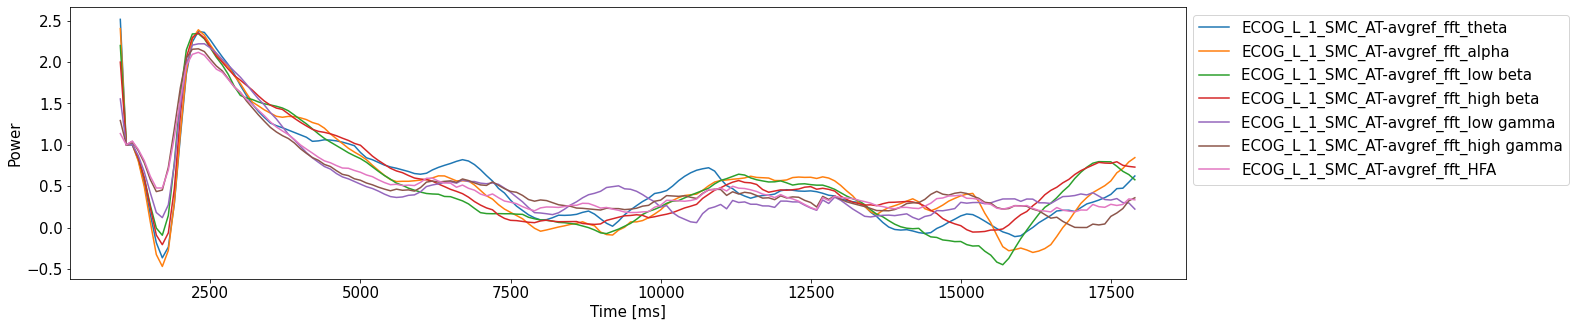

In [7]:
# The simulated time was 60 seconds
plt.figure(figsize=(20,5))
plt.plot(
        feature_reader.feature_arr["time"],
        filtered_df)
plt.legend(
        list(filtered_df.columns),
        bbox_to_anchor=(1, 1), fontsize=15)
ax = plt.gca()
plt.xlabel("Time [ms]", fontsize = 15)
plt.ylabel("Power", fontsize = 15)
ax.tick_params(labelsize=15)
plt.show()

### Plot the Hjorth Parameters for All Channels over Time

Hjorth parameters are indicators of statistical properties used in signal processing in the time domain introduced by Bo Hjorth in 1970. The parameters are Activity, Mobility, and Complexity. [1-2] These three parameters will together characterize the signal in terms of amplitude, time scale and complexity.

#### Start with Hjorth Activity

Activity, giving a measure of the squared standard deviation of the amplitude, sometimes referred to as the variance or mean power.

__Attention__: In the cells below, one can notice that the first few values of Hjorth Activity are still (significantly) above one. This is an artifact, due to the lack of data in order to normalize it properly. As soon as more data is provided, we can see that the values fall within [0,1]. For plotting, we avoid capturing this by only plotting after 2000ms.

In [8]:
df_hjorth_act = feature_reader.feature_arr.filter(like='Hjorth_Activity')

In [9]:
df_hjorth_act.T

,0,1,2,3,4,5,6,7,8,9,...,160,161,162,163,164,165,166,167,168,169
ECOG_L_1_SMC_AT-avgref_RawHjorth_Activity,556.867448,1.000000,-1.331586,-1.430748,-1.217766,-1.575171,-1.909842,-2.018384,-1.668558,-1.485233,...,0.433085,0.540957,0.495229,0.543221,0.584609,0.682858,1.181969,1.106087,2.048747,2.302955
ECOG_L_2_SMC_AT-avgref_RawHjorth_Activity,410.068736,-1.000000,-1.408197,-1.146215,-0.951559,-0.918434,-1.694155,-1.526747,-1.866941,-1.677708,...,0.907585,0.937833,0.821851,0.815921,1.029468,1.157861,1.569809,1.569124,2.028153,2.004167
ECOG_L_3_SMC_AT-avgref_RawHjorth_Activity,600.402485,-1.000000,-1.212241,-1.044035,-0.972402,-0.789110,-1.162717,-1.270446,-2.160168,-1.871951,...,0.551649,0.581943,0.550683,0.564512,0.602399,0.729394,0.760401,0.902895,1.077882,0.938083
ECOG_L_4_SMC_AT-avgref_RawHjorth_Activity,503.189871,-1.000000,-0.734623,-0.651499,-0.246066,0.715844,0.997251,-1.612237,-2.144641,-1.619130,...,0.296126,0.491862,0.408954,0.376663,0.374921,0.300480,0.416427,0.523748,1.055719,1.584552
ECOG_L_5_SMC_AT-avgref_RawHjorth_Activity,895.614714,-1.000000,-1.370817,-1.264990,-1.504271,-1.304386,-1.513226,-1.290506,-1.198131,-1.189680,...,0.165190,0.200682,0.096313,-0.083617,-0.185069,-0.102606,0.153596,0.237785,0.174236,0.417000
ECOG_L_6_SMC_AT-avgref_RawHjorth_Activity,4313.293214,-1.000000,-0.781869,-1.619459,-0.546320,0.377840,-0.843976,-2.348924,-2.398746,-1.893706,...,1.136712,1.254138,1.202388,1.253612,1.286574,1.290573,1.424540,1.388574,2.040433,2.025394
LFP_L_1_STN_BS-LFP_L_567_STN_BS_RawHjorth_Activity,192.683861,1.000000,1.037625,0.706237,0.603691,0.863789,0.744243,0.878583,0.064391,0.261096,...,0.131667,-0.298250,-0.286352,0.039547,-0.047965,-0.131087,-0.818622,-0.936386,-0.932117,-0.885677
LFP_L_234_STN_BS-LFP_L_1_STN_BS_RawHjorth_Activity,224.785120,1.000000,1.021536,0.668007,0.607526,0.809640,0.591009,0.435853,-0.199078,-0.201649,...,-0.896988,-1.239098,-0.997878,-0.898192,-0.914530,-0.908763,-1.023774,-1.017146,-1.120935,-1.051513
LFP_L_567_STN_BS-LFP_L_234_STN_BS_RawHjorth_Activity,26.441843,1.000000,0.770907,0.257790,0.616373,-1.853976,-2.362530,-2.100141,-1.776030,-1.147318,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.342876,0.886413,-0.110828,-0.438055
LFP_R_234_STN_BS-LFP_R_567_STN_BS_RawHjorth_Activity,51.114474,1.000000,-0.825980,-0.046105,1.528386,2.032267,1.523718,1.606670,1.697917,1.683846,...,0.515514,-0.065694,-0.187504,-0.220467,-0.829700,-0.561141,-0.559152,-0.592635,-0.565190,-0.420487


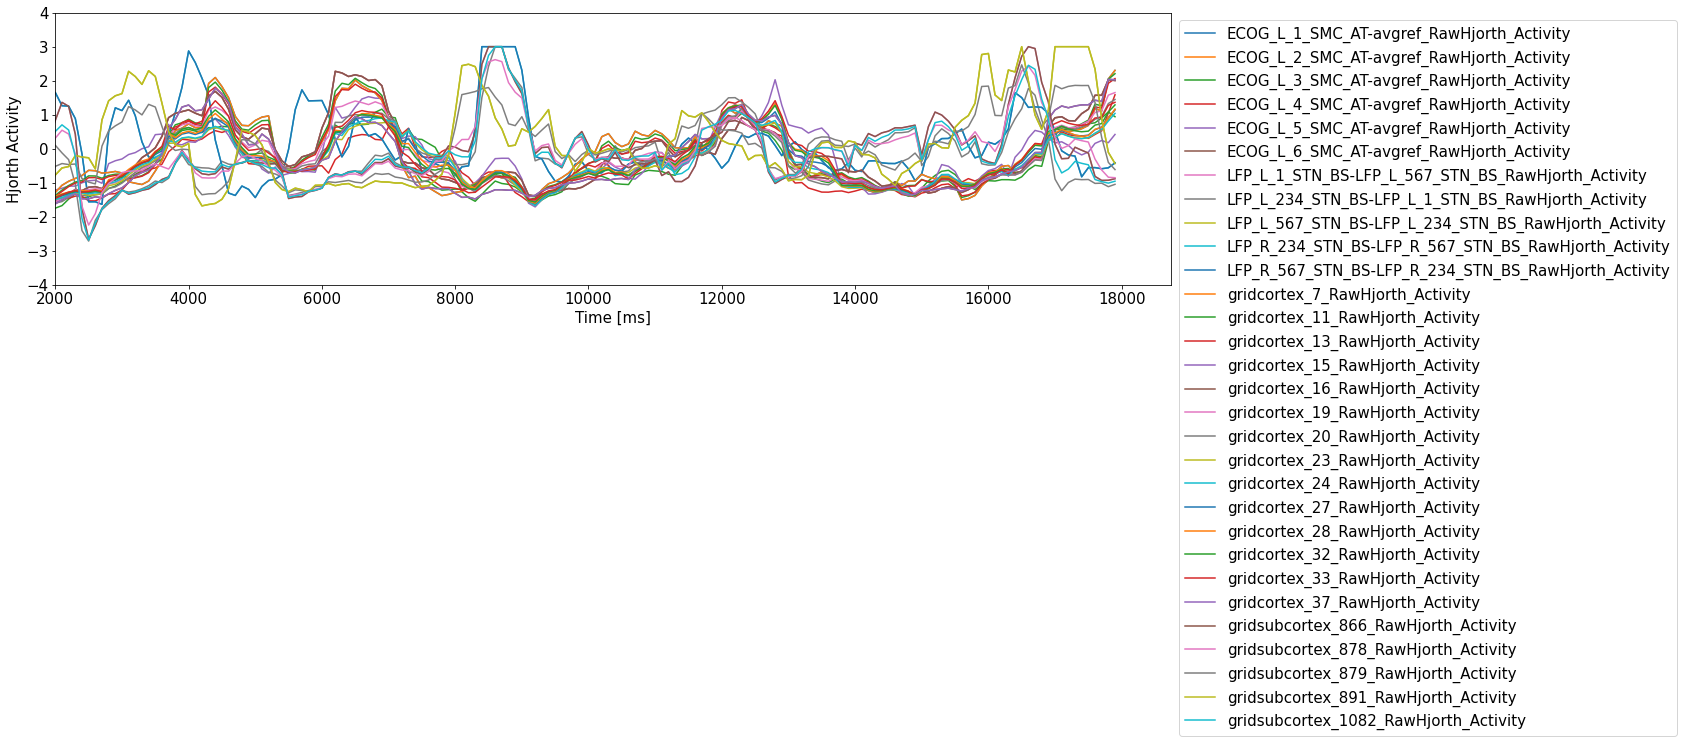

In [10]:
plt.figure(figsize=(20,5))
plt.plot(
        feature_reader.feature_arr["time"],
        df_hjorth_act)
plt.legend(
        list(df_hjorth_act.columns),
        bbox_to_anchor=(1, 1), fontsize=15)
ax = plt.gca()
plt.xlabel("Time [ms]", fontsize = 15)
plt.ylabel("Hjorth Activity", fontsize = 15)
ax.tick_params(labelsize=15)
plt.xlim(left=2000)
plt.ylim([-4,4])
plt.show()

#### Hjorth Mobility
Mobility, giving a measure of the standard deviation of the slope with reference to the standard deviation of the amplitude. It is expressed as a ratio per time unit and may be conceived also as a mean frequency.

In [11]:
df_hjorth_mob = feature_reader.feature_arr.filter(like='Hjorth_Mobility')

In [12]:
df_hjorth_mob.T

,0,1,2,3,4,5,6,7,8,9,...,160,161,162,163,164,165,166,167,168,169
ECOG_L_1_SMC_AT-avgref_RawHjorth_Mobility,0.097928,-1.000000,1.414089,0.911868,0.997374,1.745177,2.195969,2.419213,1.961323,1.704535,...,-0.238988,-0.327116,-0.329810,-0.388017,-0.507716,-0.529466,-0.842997,-0.831193,-1.289114,-1.654541
ECOG_L_2_SMC_AT-avgref_RawHjorth_Mobility,0.080716,1.000000,1.347827,0.179426,0.219692,0.741723,1.480091,1.570075,2.445989,2.152847,...,-0.169777,-0.194969,-0.261554,-0.257576,-0.482488,-0.482657,-0.774325,-0.882958,-1.058974,-1.727419
ECOG_L_3_SMC_AT-avgref_RawHjorth_Mobility,0.071561,1.000000,1.091165,-1.057906,0.624064,0.408350,-0.061323,0.230862,2.655915,2.169961,...,-0.003118,-0.102224,-0.186045,-0.217156,-0.271180,-0.350362,-0.405436,-0.470549,-0.490618,-1.182148
ECOG_L_4_SMC_AT-avgref_RawHjorth_Mobility,0.074349,1.000000,0.749353,-1.027769,-1.357720,-1.427277,-1.411707,1.177307,2.389707,1.565610,...,0.211456,0.026799,-0.086229,-0.104228,-0.140622,-0.109300,-0.113079,-0.074310,-0.376562,-1.276143
ECOG_L_5_SMC_AT-avgref_RawHjorth_Mobility,0.068921,1.000000,1.412213,1.446024,1.691009,1.476907,1.768663,1.470022,1.454666,1.507992,...,-0.037868,-0.057498,-0.001112,0.146382,0.087229,-0.018129,-0.128062,-0.191353,-0.262223,-0.571927
ECOG_L_6_SMC_AT-avgref_RawHjorth_Mobility,0.074957,1.000000,0.083450,-1.687249,-1.246172,-0.898231,-1.092720,0.605643,2.116558,1.629115,...,-0.086769,-0.168774,-0.285189,-0.334780,-0.427110,-0.448198,-0.574357,-0.568188,-0.781980,-1.766457
LFP_L_1_STN_BS-LFP_L_567_STN_BS_RawHjorth_Mobility,0.204429,-1.000000,-0.936150,-0.686323,-0.603951,-0.825630,-0.733461,-0.641057,-0.118729,-0.418296,...,-0.438433,0.076090,0.005025,-0.419401,-0.388074,-0.274434,0.803232,1.147384,1.119265,0.974694
LFP_L_234_STN_BS-LFP_L_1_STN_BS_RawHjorth_Mobility,0.198824,-1.000000,-0.906470,-0.657151,-0.605229,-0.715419,-0.581361,-0.328829,0.182057,-0.017747,...,1.012426,1.980387,1.246577,0.936443,0.950492,0.877013,1.118998,1.134404,1.424387,1.247317
LFP_L_567_STN_BS-LFP_L_234_STN_BS_RawHjorth_Mobility,0.295503,-1.000000,-1.267624,-1.251061,-1.563687,1.537807,2.382978,2.276460,1.993162,1.025919,...,-1.765605,-2.159064,-2.569208,-2.614093,-2.540536,-2.346681,-1.858924,-1.178145,-0.204297,0.300128
LFP_R_234_STN_BS-LFP_R_567_STN_BS_RawHjorth_Mobility,0.307995,-1.000000,0.391812,-0.464637,-1.715242,-1.963957,-1.513267,-1.517001,-1.544491,-1.482844,...,-0.761230,-0.069498,0.073756,0.110184,1.422391,0.767018,0.707839,0.758289,0.743802,0.486460


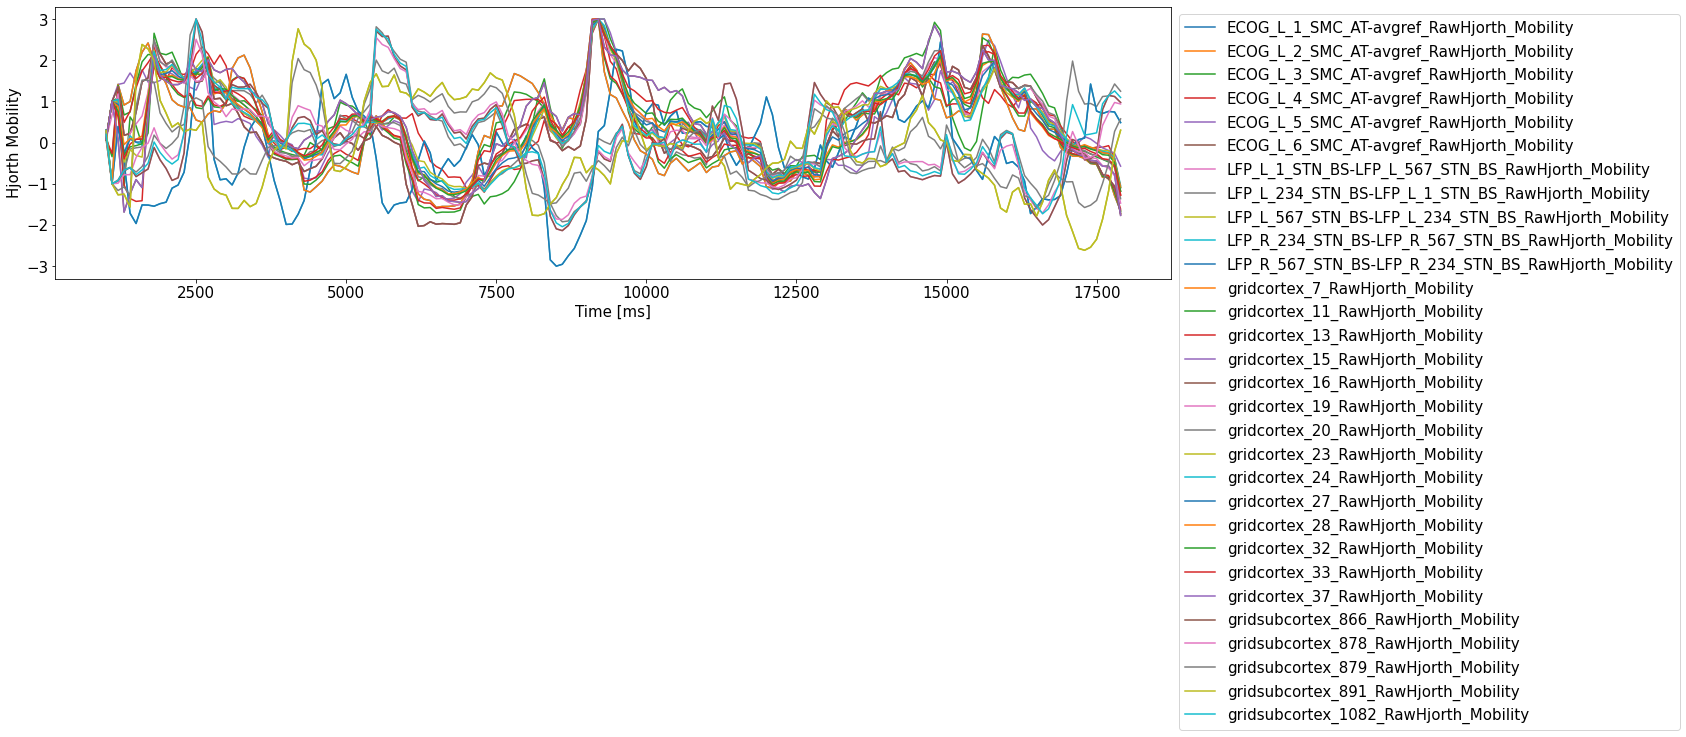

In [13]:
plt.figure(figsize=(20,5))
plt.plot(
        feature_reader.feature_arr["time"],
        df_hjorth_mob)
plt.legend(
        list(df_hjorth_mob.columns),
        bbox_to_anchor=(1, 1), fontsize=15)
ax = plt.gca()
plt.xlabel("Time [ms]", fontsize = 15)
plt.ylabel("Hjorth Mobility", fontsize = 15)
ax.tick_params(labelsize=15)
plt.show()

#### Hjorth Complexity
Complexity, giving a measure of excessive details with reference to the “softest” possible curve shape, th sine wave, this corresponding to unity. It is expressed as the number of standard slopes actually generated during the average time required for generation of one standard amplitude as given by the mobility. Due to the non-linear calculation of standard deviation this parameter will quantify any deviation from the sine shape as an increase from unity

In [14]:
df_hjorth_com = feature_reader.feature_arr.filter(like='Hjorth_Complexity')

In [15]:
df_hjorth_com.T

,0,1,2,3,4,5,6,7,8,9,...,160,161,162,163,164,165,166,167,168,169
ECOG_L_1_SMC_AT-avgref_RawHjorth_Complexity,12.191996,-1.000000,-1.376847,0.806529,0.516337,-1.656715,-2.137448,-2.380770,-1.944643,-1.661264,...,-0.447383,-0.310537,-0.232644,-0.230409,-0.144688,-0.146629,0.165795,0.277982,0.791768,2.199179
ECOG_L_2_SMC_AT-avgref_RawHjorth_Complexity,11.489600,-1.000000,-1.152245,1.371974,0.954829,0.147533,0.601504,0.392444,-1.677881,-1.810804,...,-1.158252,-1.063825,-0.900704,-0.964457,-0.721798,-0.764718,-0.539276,-0.273495,-0.144729,2.077512
ECOG_L_3_SMC_AT-avgref_RawHjorth_Complexity,11.060957,-1.000000,0.214116,1.719810,0.558101,0.454328,1.118990,1.006341,-0.790578,-0.702087,...,-1.362491,-1.273374,-1.083199,-1.043040,-0.968736,-0.925736,-0.857694,-0.834991,-0.865451,0.880778
ECOG_L_4_SMC_AT-avgref_RawHjorth_Complexity,11.283918,1.000000,1.409255,1.710945,1.492685,1.171710,1.051347,-0.512285,-1.672970,-1.083303,...,-1.162456,-0.988009,-0.813477,-0.730401,-0.817819,-0.690331,-0.807409,-0.942690,-0.861859,0.639922
ECOG_L_5_SMC_AT-avgref_RawHjorth_Complexity,11.693642,1.000000,-1.342046,-1.544551,-1.569441,-1.458698,-1.673384,-1.417861,-1.499239,-1.528198,...,-0.678170,-0.630705,-0.673321,-0.786731,-0.494561,-0.461790,-0.484335,-0.466674,-0.223999,0.344114
ECOG_L_6_SMC_AT-avgref_RawHjorth_Complexity,7.594804,-1.000000,1.129746,1.722294,1.148850,0.521100,0.846610,0.109732,-0.661602,-0.436900,...,-1.431566,-1.342084,-1.203501,-1.148914,-1.108526,-1.077693,-0.935809,-0.926386,-0.939516,1.262433
LFP_L_1_STN_BS-LFP_L_567_STN_BS_RawHjorth_Complexity,6.615024,1.000000,1.002579,0.685841,0.621574,1.029290,0.953374,0.887228,0.261306,0.670775,...,0.210650,-0.291767,-0.233787,0.189971,0.176239,0.050507,-0.797778,-1.006677,-0.997483,-0.936379
LFP_L_234_STN_BS-LFP_L_1_STN_BS_RawHjorth_Complexity,6.839337,1.000000,0.951515,0.635812,0.620035,0.867662,0.702662,0.492905,-0.140220,0.146485,...,-0.950374,-1.497005,-1.113165,-0.906291,-0.895627,-0.860457,-1.003620,-1.033516,-1.211970,-1.113721
LFP_L_567_STN_BS-LFP_L_234_STN_BS_RawHjorth_Complexity,4.903570,1.000000,1.326099,1.370614,1.383910,-1.114396,-2.324834,-2.166713,-1.874964,-1.158205,...,2.431739,3.000000,3.000000,3.000000,3.000000,3.000000,2.285432,1.057066,-0.026733,-0.413976
LFP_R_234_STN_BS-LFP_R_567_STN_BS_RawHjorth_Complexity,4.554805,1.000000,-0.331171,0.279184,1.692459,1.996853,1.563936,1.639347,1.748950,1.592691,...,0.582544,-0.040750,-0.188930,-0.227169,-1.060316,-0.677220,-0.630057,-0.674177,-0.695385,-0.547499


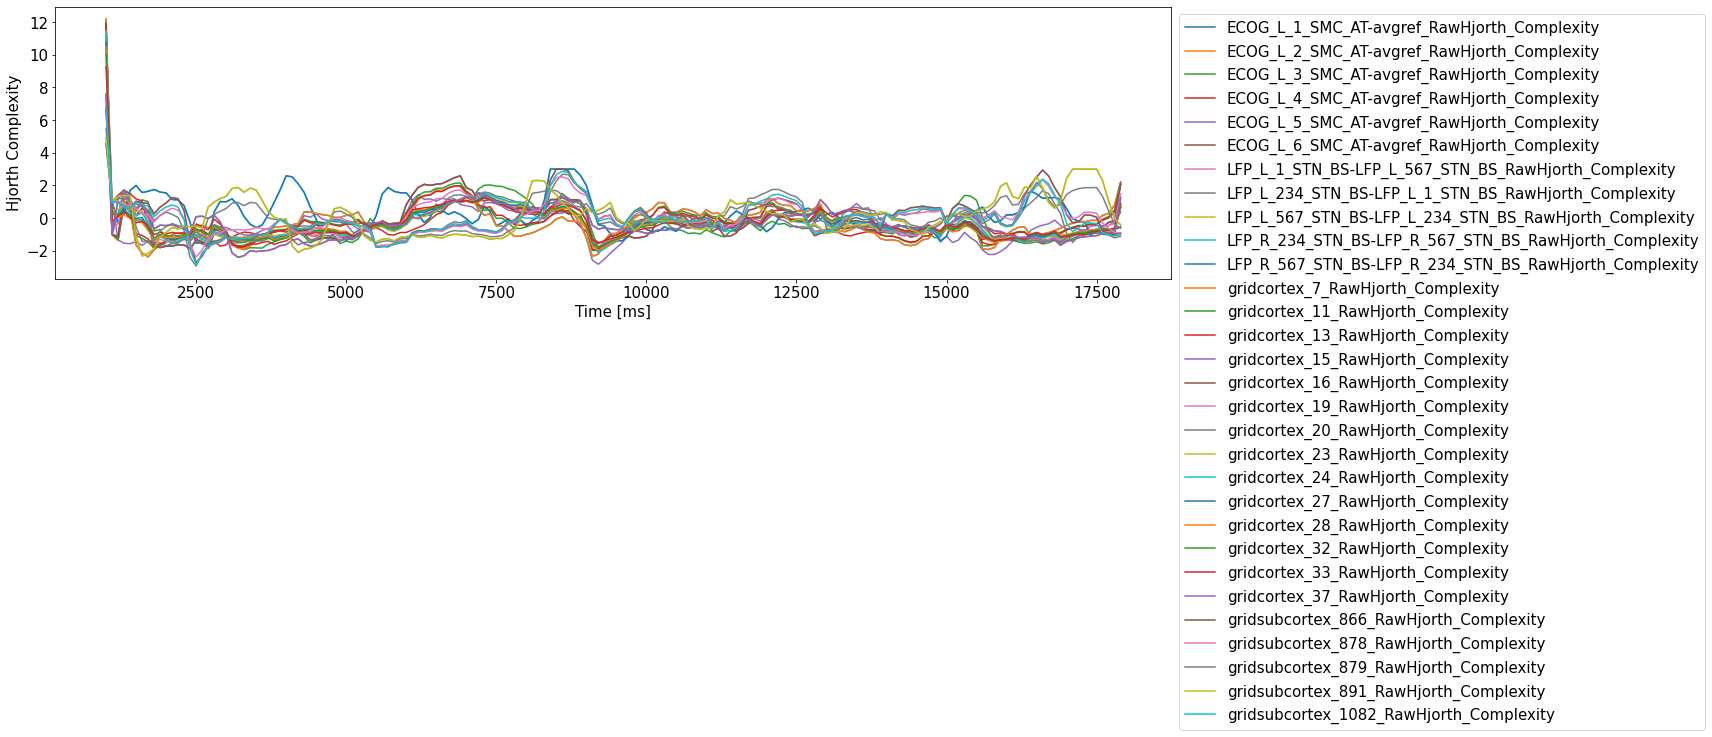

In [16]:
plt.figure(figsize=(20,5))
plt.plot(
        feature_reader.feature_arr["time"],
        df_hjorth_com)
plt.legend(
        list(df_hjorth_com.columns),
        bbox_to_anchor=(1, 1), fontsize=15)
ax = plt.gca()
plt.xlabel("Time [ms]", fontsize = 15)
plt.ylabel("Hjorth Complexity", fontsize = 15)
ax.tick_params(labelsize=15)
plt.show()

## Feature correlation plot
In order to plot the features correlation matrix, we can use the function ```plot_corr_matrix``` from ```nm_plots```.
Since we have too many features, let's plot only the fft features from the ECoG channel ```'ECOG_L_1_SMC_AT```. There are a couple of different ways of doing it. The first one is by giving the whole dataframe as input, but giving a list of the ```feature_names``` we want to plot - those names should be exactly correspondent to the columns on the ```feature_reader.feature_arr``` dataframe.


Correlation matrix figure saved to /home/lauraflyra/Documents/BCCN/Lab_Rotation_DBS_Decoding/Code/py_neuromodulation/examples.png


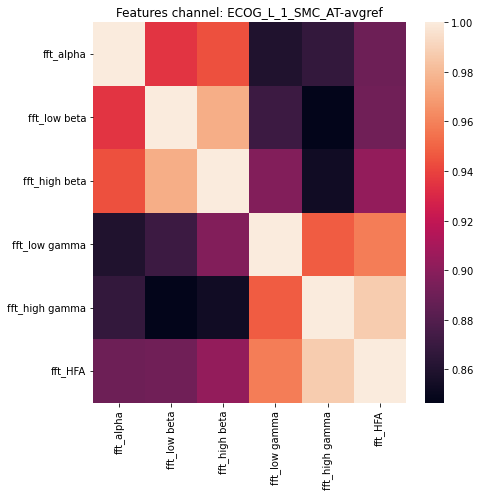

In [17]:
nm_plots.plot_corr_matrix(
        feature = feature_reader.feature_arr,
        feature_file=feature_reader.feature_file,
        ch_name='ECOG_L_1_SMC_AT-avgref',
        feature_names=["ECOG_L_1_SMC_AT-avgref_fft_alpha",
                    "ECOG_L_1_SMC_AT-avgref_fft_low beta",
                    "ECOG_L_1_SMC_AT-avgref_fft_high beta",
                    "ECOG_L_1_SMC_AT-avgref_fft_low gamma",
                    "ECOG_L_1_SMC_AT-avgref_fft_high gamma",
                    "ECOG_L_1_SMC_AT-avgref_fft_HFA"],
        show_plot=True,
)

Normally, copying and pasting all the names might be too much work, so we can also use the `regex` parameter from `df.filter` as a way to filter for a specific channel. In the next cell, we plot all features that were computed with the data from electrode `ECOG_L_1_SMC_AT`.

Correlation matrix figure saved to /home/lauraflyra/Documents/BCCN/Lab_Rotation_DBS_Decoding/Code/py_neuromodulation/examples.png


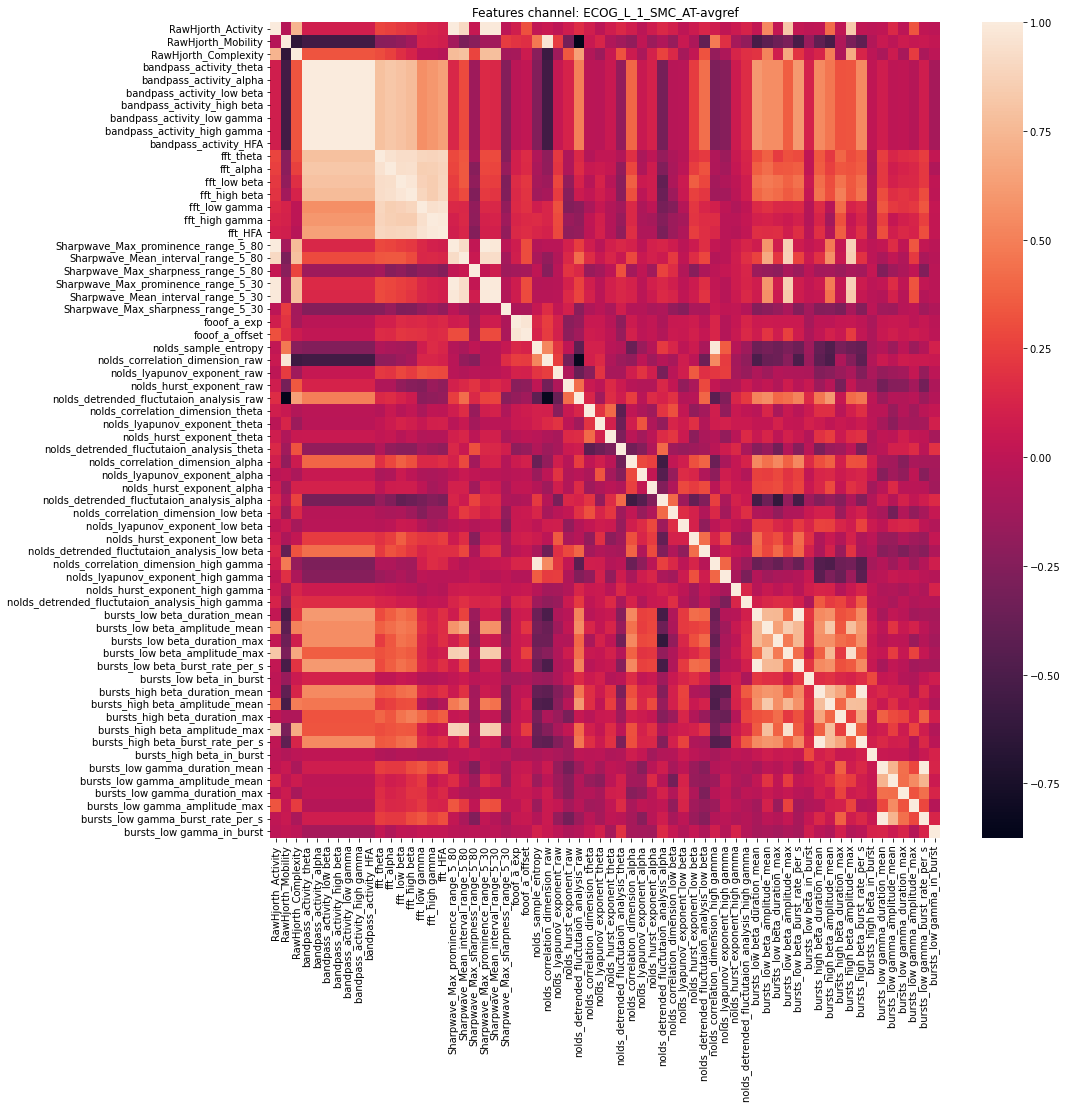

In [18]:
nm_plots.plot_corr_matrix(
        feature = feature_reader.feature_arr.filter(regex='ECOG_L_1_SMC_AT'),
        ch_name= 'ECOG_L_1_SMC_AT-avgref',
        feature_names=feature_reader.feature_arr.filter(regex='ECOG_L_1').columns,
        feature_file=feature_reader.feature_file,
        show_plot=True,
        figsize=(15,15),
)

## Plot all features for an ECoG channel and one point in the cortical grid

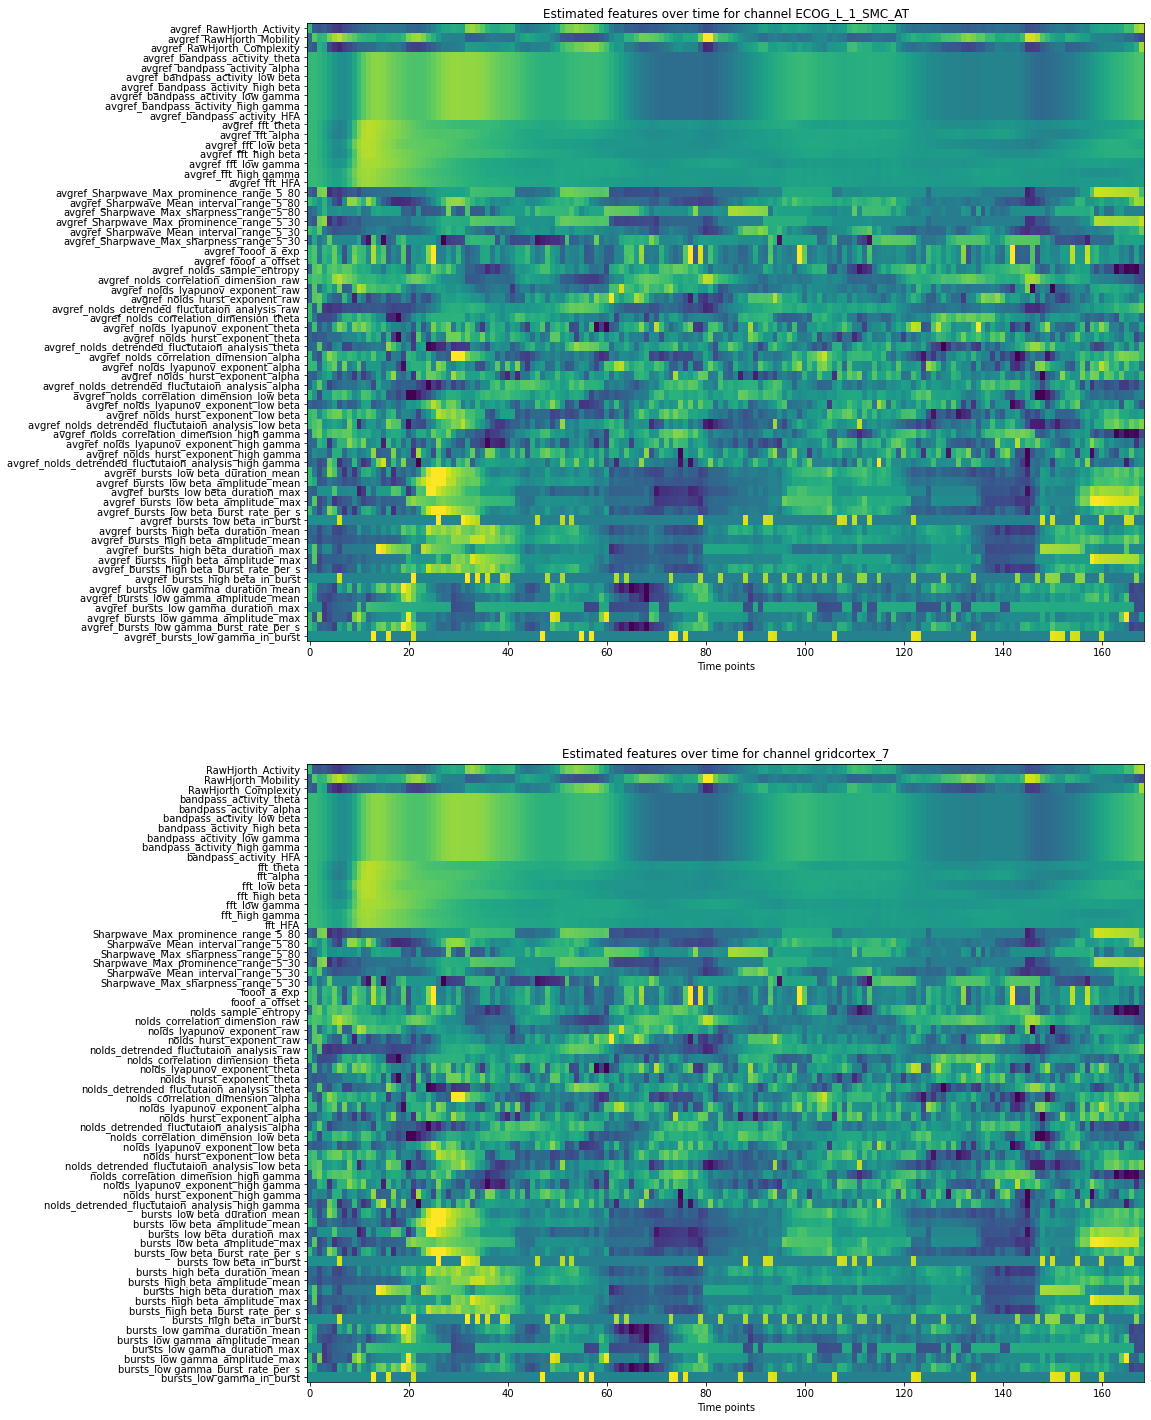

In [19]:
fig, axs = plt.subplots(nrows=2, ncols=1)
fig.set_figheight(25)
fig.set_figwidth(15)

# We arbitrarily decided to plot the features from the first ECoG channel
ch_name_ECOG = 'ECOG_L_1_SMC_AT'
# In order to make nice labels in the y axis we do:
feature_names = list(feature_reader.feature_arr.filter(regex=ch_name_ECOG)[1:].columns)
feature_col_name = [
    i[len(ch_name_ECOG) + 1 :] for i in feature_names if ch_name_ECOG in i
]
# Here we remove the first data point from all features, because the normalization only starts in the second data point.
axs[0].imshow(feature_reader.feature_arr.filter(regex=ch_name_ECOG)[1:].T, aspect='auto')
axs[0].set_yticks(np.arange(0, len(feature_names), 1), feature_col_name)
axs[0].set_title("Estimated features over time for channel {}".format(ch_name_ECOG))
axs[0].set_xlabel("Time points")

# We arbitrarily decided to plot the features from the first ECoG channel
ch_name_grid = 'gridcortex_7'
# In order to make nice labels in the y axis we do:
feature_names = list(feature_reader.feature_arr.filter(regex=ch_name_grid)[1:].columns)
feature_col_name = [
    i[len(ch_name_grid) + 1 :] for i in feature_names if ch_name_grid in i
]
# Here we remove the first data point from all features, because the normalization only starts in the second data point.
axs[1].imshow(feature_reader.feature_arr.filter(regex=ch_name_grid)[1:].T, aspect='auto')
axs[1].set_yticks(np.arange(0, len(feature_names), 1), feature_col_name)
axs[1].set_title("Estimated features over time for channel {}".format(ch_name_grid))
axs[1].set_xlabel("Time points");

## All ECoG channels for one feature

In [20]:
feature_name = 'fft_theta'
df_feature_ECOG = feature_reader.feature_arr.filter(regex=feature_name).filter(regex="ECOG").T

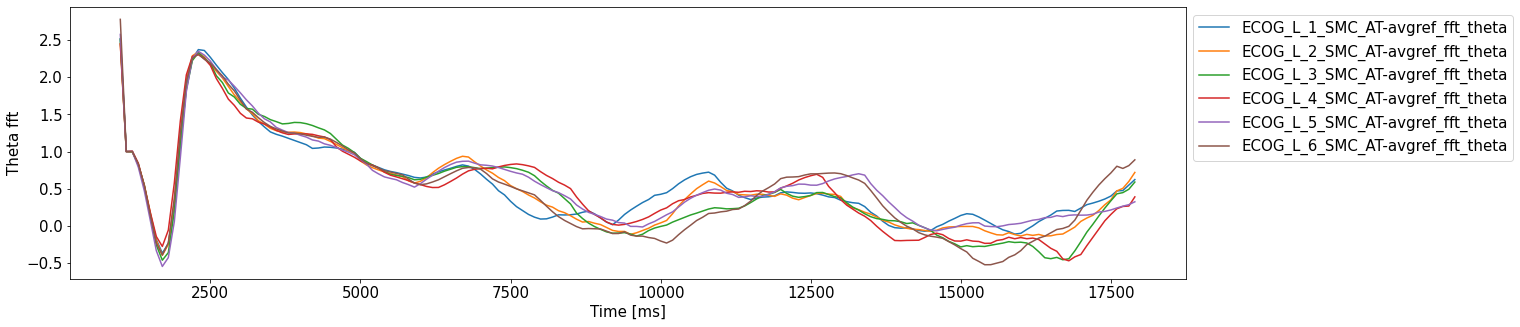

In [21]:
plt.figure(figsize=(20,5))
plt.plot(
        feature_reader.feature_arr["time"],
        df_feature_ECOG.T)
plt.legend(
        list(df_feature_ECOG.T.columns),
        bbox_to_anchor=(1, 1), fontsize=15)
ax = plt.gca()
plt.xlabel("Time [ms]", fontsize = 15)
plt.ylabel("Theta fft", fontsize = 15)
ax.tick_params(labelsize=15)
plt.show()

## All grid points for one feature

In [22]:
df_feature_grid = feature_reader.feature_arr.filter(regex=feature_name).filter(regex="gridcortex").T

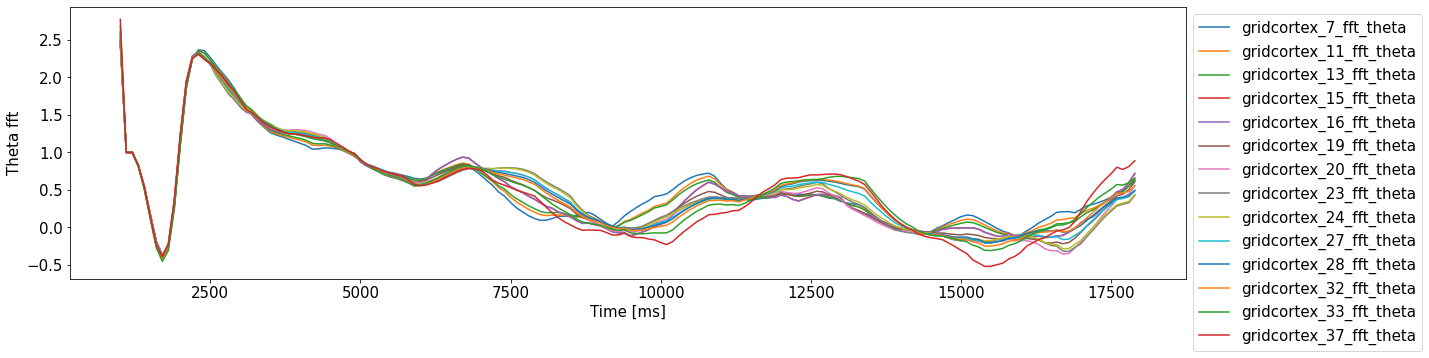

In [23]:
plt.figure(figsize=(20,5))
plt.plot(
        feature_reader.feature_arr["time"],
        df_feature_grid.T)
plt.legend(
        list(df_feature_grid.T.columns),
        bbox_to_anchor=(1, 1), fontsize=15)
ax = plt.gca()
plt.xlabel("Time [ms]", fontsize = 15)
plt.ylabel("Theta fft", fontsize = 15)
ax.tick_params(labelsize=15)
plt.show()

__References__
[1] Hjorth, Bo. “EEG Analysis Based on Time Domain Properties.” Electroencephalography and Clinical Neurophysiology 29, no. 3 (September 1, 1970): 306–10. https://doi.org/10.1016/0013-4694(70)90143-4.
[2] https://en.wikipedia.org/wiki/Hjorth_parameters

